In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
#training = pd.read_csv('Data/Training.csv')
#testing = pd.read_csv('Data/Testing.csv')
training = pd.read_csv('Data/Training.csv')
testing = pd.read_csv('Data/Testing.csv')
cols = testing.columns
cols = cols[:-1]
x = testing[cols]
y = testing['prognosis']
y1 = y

reduced_data = testing.groupby(testing['prognosis']).max()

# Mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
classes = le.classes_.tolist()  # Get the class labels in string format

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

testx = testing[cols]
testy = testing['prognosis']
testy = le.transform(testy)

clf1 = DecisionTreeClassifier()
clf = clf1.fit(x_train, y_train)
y_pred = clf.predict(x_test)


# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(threshold=np.inf) 
print("Confusion Matrix:")
print(cm)


report = classification_report(y_test, y_pred, target_names=classes)
print("Classification Report:")
print(report)
report_dict = classification_report(y_test, y_pred, target_names=classes, output_dict=True)

# Write the classification report to a CSV file
with open('Data/classification_report_DTC.csv', 'w', newline='') as csvfile:
    fieldnames = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header row
    writer.writeheader()
    
    # Write the report row by row
    for class_name, metrics in report_dict.items():
        if class_name in classes:
            writer.writerow({
                'Class': class_name,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Support': metrics['support']
            })


Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  

In [3]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.981549815498155


In [4]:



# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [5]:
from sklearn.svm import SVC

clf1 = SVC()
clf = clf1.fit(x_train, y_train)

y_pred = clf.predict(x_test)
# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(threshold=np.inf) 
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred, target_names=classes)
print("Classification Report:")
print(report)

Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


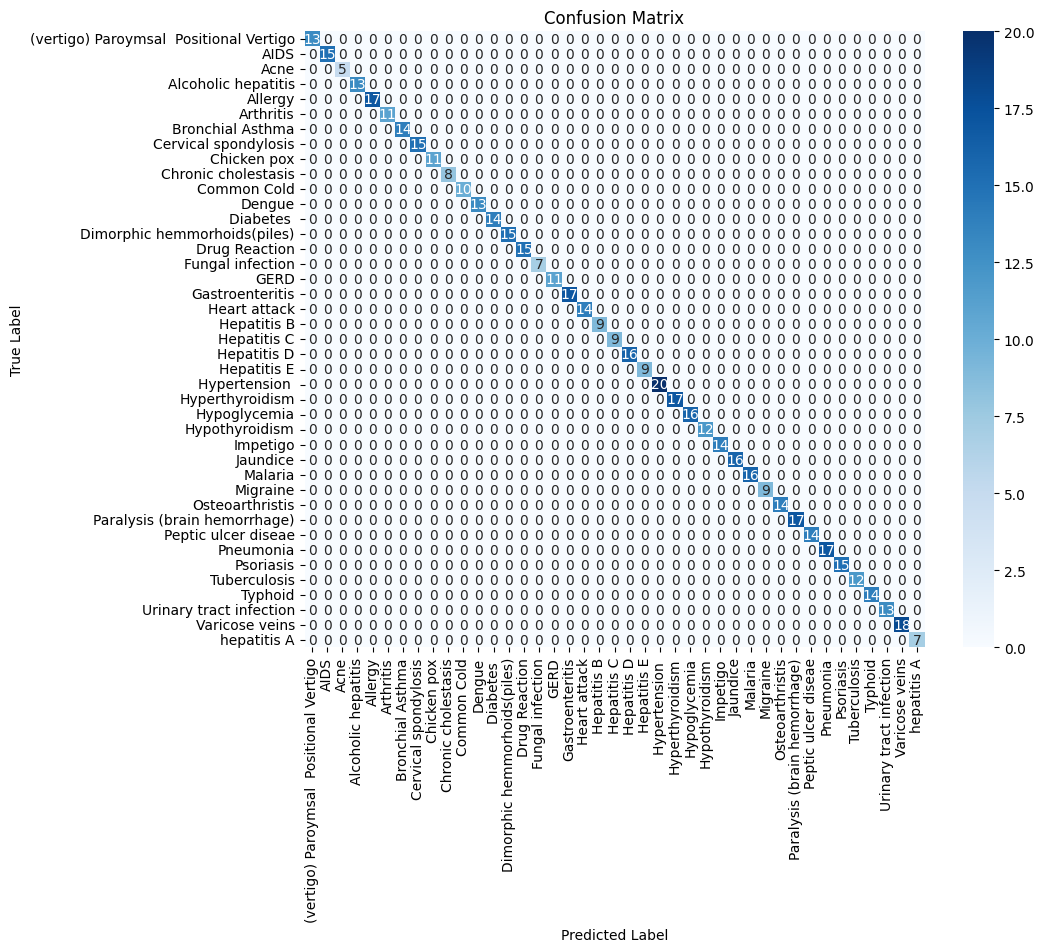

In [7]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("for DecisionTreeClassifier:", end=" ")
print(model.score(x_test,y_test))

model = SVC()
model.fit(x_train,y_train)
print("for svm: ", end=" ")
print(model.score(x_test,y_test))

for DecisionTreeClassifier: 0.974169741697417
for svm:  1.0


In [10]:
""""
report_dict = classification_report(y_test, y_pred, target_names=classes, output_dict=True)

# Write the classification report to a CSV file
with open('Data/classification_report_svm.csv', 'w', newline='') as csvfile:
    fieldnames = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header row
    writer.writeheader()
    
    # Write the report row by row
    for class_name, metrics in report_dict.items():
        if class_name in classes:
            writer.writerow({
                'Class': class_name,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Support': metrics['support']
            })

""""